# Portfolio 04

In [6]:
name = "Pradyot Jain"
student_id = "48479985"

### Data Source and Description

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

**Data Source**: The dataset was obtained from the [diabetes_prediction_dataset(Kaggle)](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)
 
The dataset consists of 9 columns and 100000 rows. The data set includes the following columns:

| Column Name          | Description                                                                                         |
|----------------------|-----------------------------------------------------------------------------------------------------|
| `gender`             | The gender of the individual, with values 'Male', 'Female' and 'Other'.                              |
| `age`                | The age of the individual in years.                                                                  |
| `hypertension`       | Indicates if the individual has hypertension (1) or not (0).                                         |
| `heart_disease`      | Indicates if the individual has a history of heart disease (1) or not (0).                           |
| `smoking_history`    | The smoking history of the individual, with categories such as 'never', 'current', 'No Info', etc.   |
| `bmi`                | The Body Mass Index (BMI) of the individual, representing their weight-to-height ratio.              |
| `HbA1c_level`        | The level of Hemoglobin A1c, a measure of blood sugar levels over time.                              |
| `blood_glucose_level`| The level of blood glucose, an indicator of current blood sugar level.                              |
| `diabetes`           | Indicates whether the individual has diabetes (1) or not (0).                                        | superannuation balance          |


### Objective: 
 1. Predicting Diabetes Risk Using Regression and Neural Network Models with Cross-Validation, Feature Selection, and KNN Optimization
 2. Identifying Key Risk Factors for Diabetes Using GaussianNB, CategoricalNB, and Bayesian Network Analysis.


## Load the dataset and show the basic information

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Loading the data from the CSV file
diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')

# Displaying the first few rows
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
diabetes_data.shape # Number of rows and columns

(100000, 9)

# Exploratory Data Analysis

### Step 01: Data Overview

In [19]:
# Summary of the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
# Chekcing number of unique items in each columns
diabetes_data.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [23]:
# checking for column names
diabetes_data.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

### Step 02: Desccriptive Summary

In [26]:
# Statistical summary of numerical columns
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Group Summary Statistics

In [29]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [31]:
# Calculating mean, median, and count for each numerical feature grouped by diabetes status
group_stats = diabetes_data.groupby('diabetes')[numerical_features].agg(['mean', 'median', 'count'])
group_stats

age                      bmi               HbA1c_level         \
               mean median  count       mean median  count        mean median   
diabetes                                                                        
0         40.115187   40.0  91500  26.887163  27.32  91500    5.396761    5.8   
1         60.946588   62.0   8500  31.988382  29.97   8500    6.934953    6.6   

                blood_glucose_level                
          count                mean median  count  
diabetes                                           
0         91500          132.852470  140.0  91500  
1          8500          194.094706  160.0   8500

The group statistics comparing diabetic (diabetes = 1) and non-diabetic (diabetes = 0) individuals reveal the following insights:

- **Age:** On average, diabetic individuals are older (mean age 61) compared to non-diabetic individuals (mean age 40).
- **BMI:** Diabetic individuals have a higher average BMI (32) compared to non-diabetic individuals (27), indicating a potential association between higher BMI and diabetes.
- **HbA1c Level:** Diabetic individuals have a significantly higher average HbA1c level (6.93) compared to non-diabetic individuals (5.40), which aligns with the known relationship between HbA1c levels and diabetes.
- **Blood Glucose Level:** Diabetic individuals also have a much higher average blood glucose level (194) compared to non-diabetic individuals (133), again indicating an association with diabetes.

In [34]:
# Caculating group_stats for non numerical data:
categorical_features = ['gender', 'smoking_history']
grouped_categorical_stats = {}

for feature in categorical_features:
    counts = diabetes_data.groupby(['diabetes', feature]).size().unstack().fillna(0)
    proportions = counts.div(counts.sum(axis=1), axis=0)  # Proportions within each diabetes group
    grouped_categorical_stats[feature] = pd.concat([counts, proportions], axis=1, keys=['Counts', 'Proportions'])
   
grouped_categorical_stats

{'gender':            Counts                Proportions                    
 gender     Female     Male Other      Female      Male     Other
 diabetes                                                        
 0         54091.0  37391.0  18.0    0.591158  0.408645  0.000197
 1          4461.0   4039.0   0.0    0.524824  0.475176  0.000000,
 'smoking_history':                  Counts                                         Proportions  \
 smoking_history No Info current  ever former  never not current     No Info   
 diabetes                                                                      
 0                 34362    8338  3532   7762  31749        5757    0.375541   
 1                  1454     948   472   1590   3346         690    0.171059   
 
                                                                      
 smoking_history   current      ever    former     never not current  
 diabetes                                                             
 0                0.09112

### Group Statistics for Categorical Features by Diabetes Status

#### 1. Gender
- **Counts:**
  - Among non-diabetic individuals, approximately 59% are Female, 41% are Male, and a negligible number are classified as Other.
  - Among diabetic individuals, about 52% are Female, and 48% are Male, with no individuals in the Other category.
- **Proportions:**
  - Diabetic individuals have a slightly higher proportion of Males compared to non-diabetic individuals.

#### 2. Smoking History
- **Counts:**
  - In the non-diabetic group, the highest counts are found in 'No Info' and 'never' smoking categories, followed by 'current' smokers.
  - In the diabetic group, the counts are similarly highest in the 'never' category, but the proportion of 'former' smokers is higher compared to non-diabetic individuals.
- **Proportions:**
  - Diabetic individuals are more likely to be former smokers (18.7%) compared to non-diabetic individuals (8.8%).
  - The proportion of individuals with 'No Info' on smoking history is significantly lower in diabetic individuals.


### Step 03: Checking for Missing Values

In [38]:
# Checking for missing values
null_values = diabetes_data.isnull().sum()
null_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**There is no null values in the dataset.**

### Step 04: Check for Duplicate rows

In [42]:
# Checking for duplicate rows
duplicates_count = diabetes_data.duplicated().sum()
print(duplicates_count)

3854


In [27]:
# Removing the duplicate rows
if duplicates_count > 0:
    diabetes_data = diabetes_data.drop_duplicates().reset_index(drop=True)

duplicates_count, diabetes_data.shape

(3854, (96146, 9))

**There were duplicate rows which were dropped.**

### Step 05: Univariate Analysis

In [30]:
# List of numerical predictors to analyze for outliers
numerical_predictors = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [31]:
# Generating summary statistics for numerical features
summary_stats = diabetes_data[numerical_predictors].describe()
summary_stats

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


### Boxplot and Histogram to visualise outtliers and skewness.

In [204]:
diabetes_data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

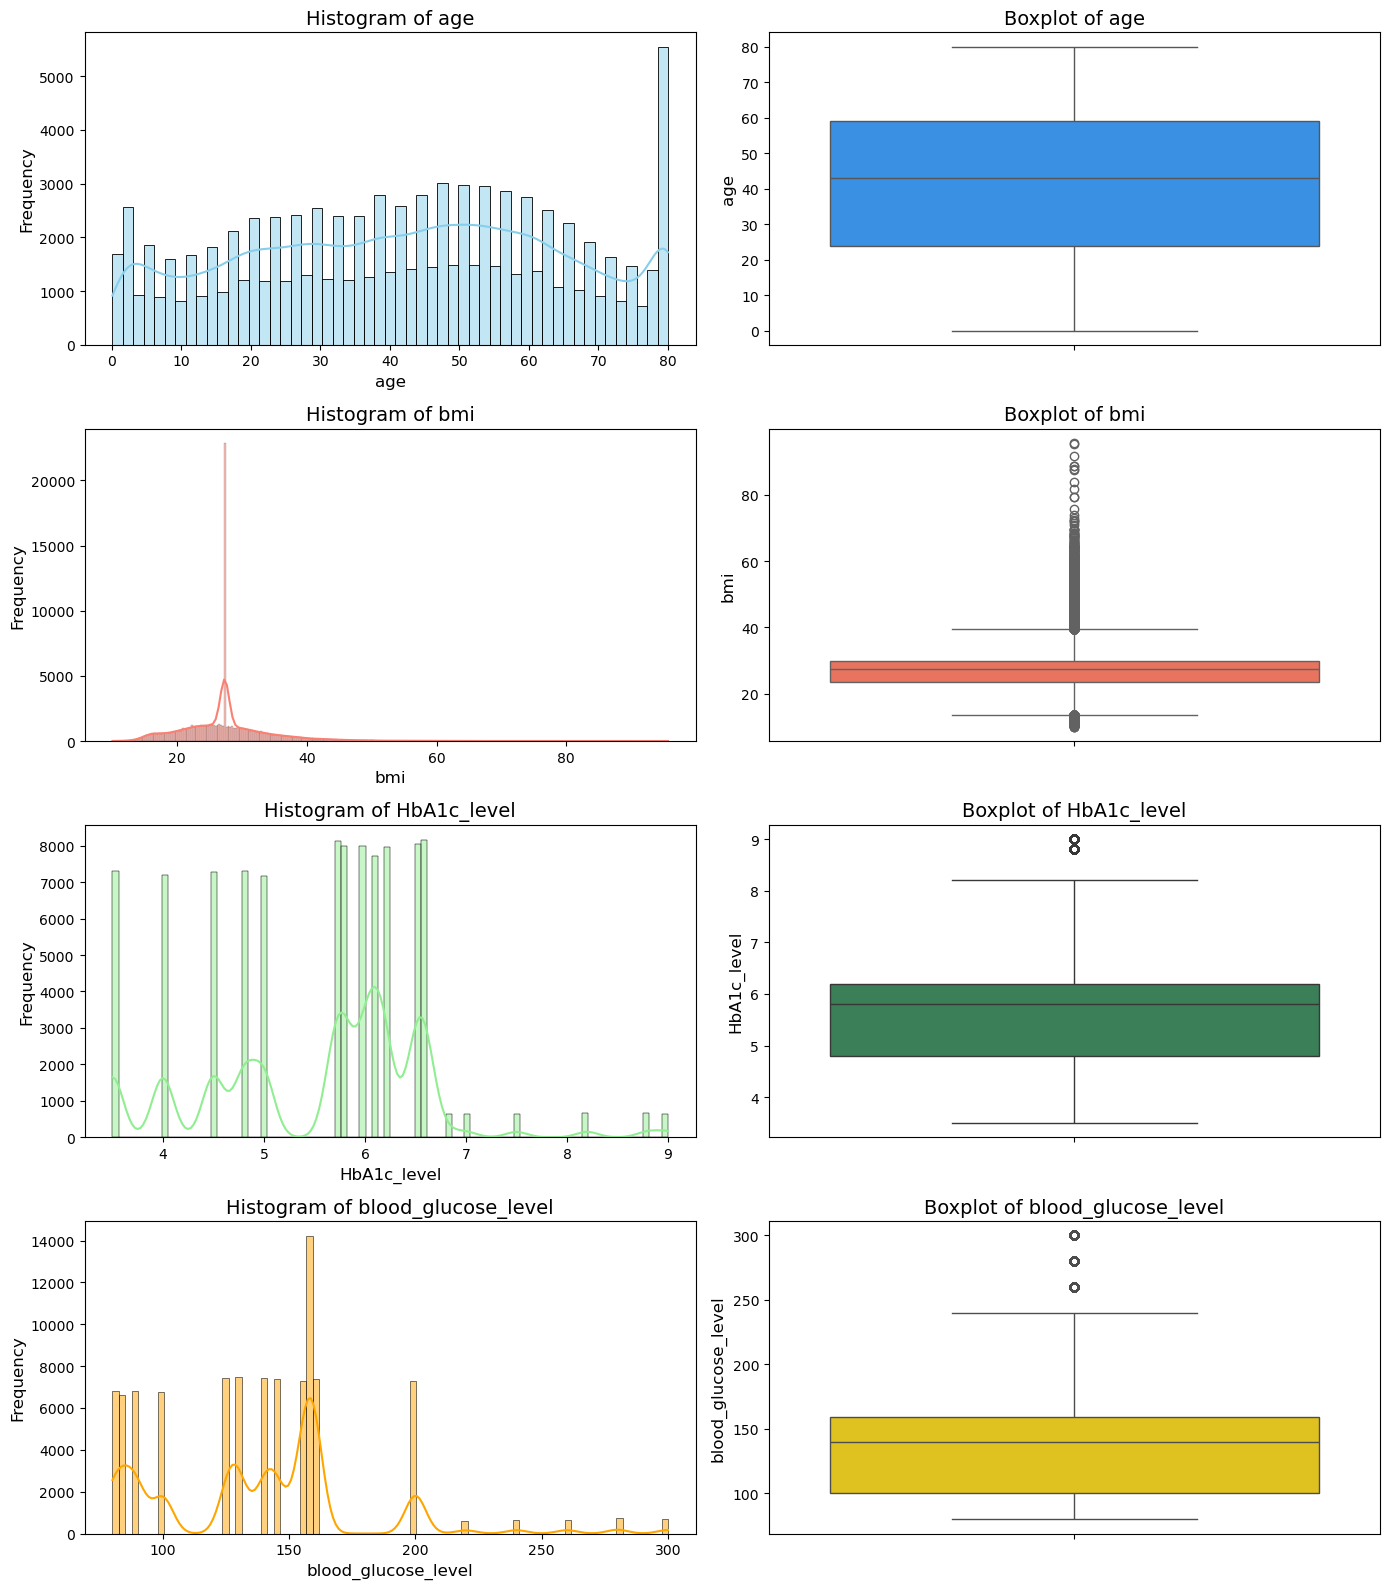

In [34]:
# Setting color palettes for improved visualization
hist_colors = ['skyblue', 'salmon', 'lightgreen', 'orange']
box_colors = ['dodgerblue', 'tomato', 'seagreen', 'gold']

# Plotting histograms and boxplots for numerical features
plt.figure(figsize=(14, 16))
for i, (feature, hist_color, box_color) in enumerate(zip(numerical_predictors, hist_colors, box_colors), 1):
    # Histogram with KDE
    plt.subplot(4, 2, 2*i - 1)
    sns.histplot(diabetes_data[feature], kde=True, color=hist_color)
    plt.title(f'Histogram of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Boxplot
    plt.subplot(4, 2, 2*i)
    sns.boxplot(data=diabetes_data, y=feature, color=box_color)
    plt.title(f'Boxplot of {feature}', fontsize=14)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

**1. Age:**
- **Histogram:** The distribution is bimodal, with peaks around younger ages (under 20) and middle-aged adults (around 60).
- **Boxplot:** No significant outliers detected.

**2. BMI:**
- **Histogram:** The distribution is approximately normal but slightly right-skewed, with a concentration around the mean (~27).
- **Boxplot:** Significant number of high outliers, likely indicating individuals with higher BMI values than typical, which could impact health.

**3. HbA1c Level:**
- **Histogram:** The data shows a left-skewed distribution, with most values between 4 and 7, indicating that most individuals fall within or near the normal range.
- **Boxplot:** Several high outliers are present, potentially representing individuals with elevated blood sugar levels over time.

**4. Blood Glucose Level:**
- **Histogram:** Right-skewed distribution with a peak around 100-140, common for normal glucose levels.
- **Boxplot:** A considerable number of high outliers, suggesting the presence of individuals with elevated glucose levels, which are typical markers for diabetes risk.

## Step 06: Bi-Variate Analysis

### Visualisation 01: Scatter plots of numerical predictors vs. target (diabetes)

In [38]:
# List of features to analyze against the target variable
predictor_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

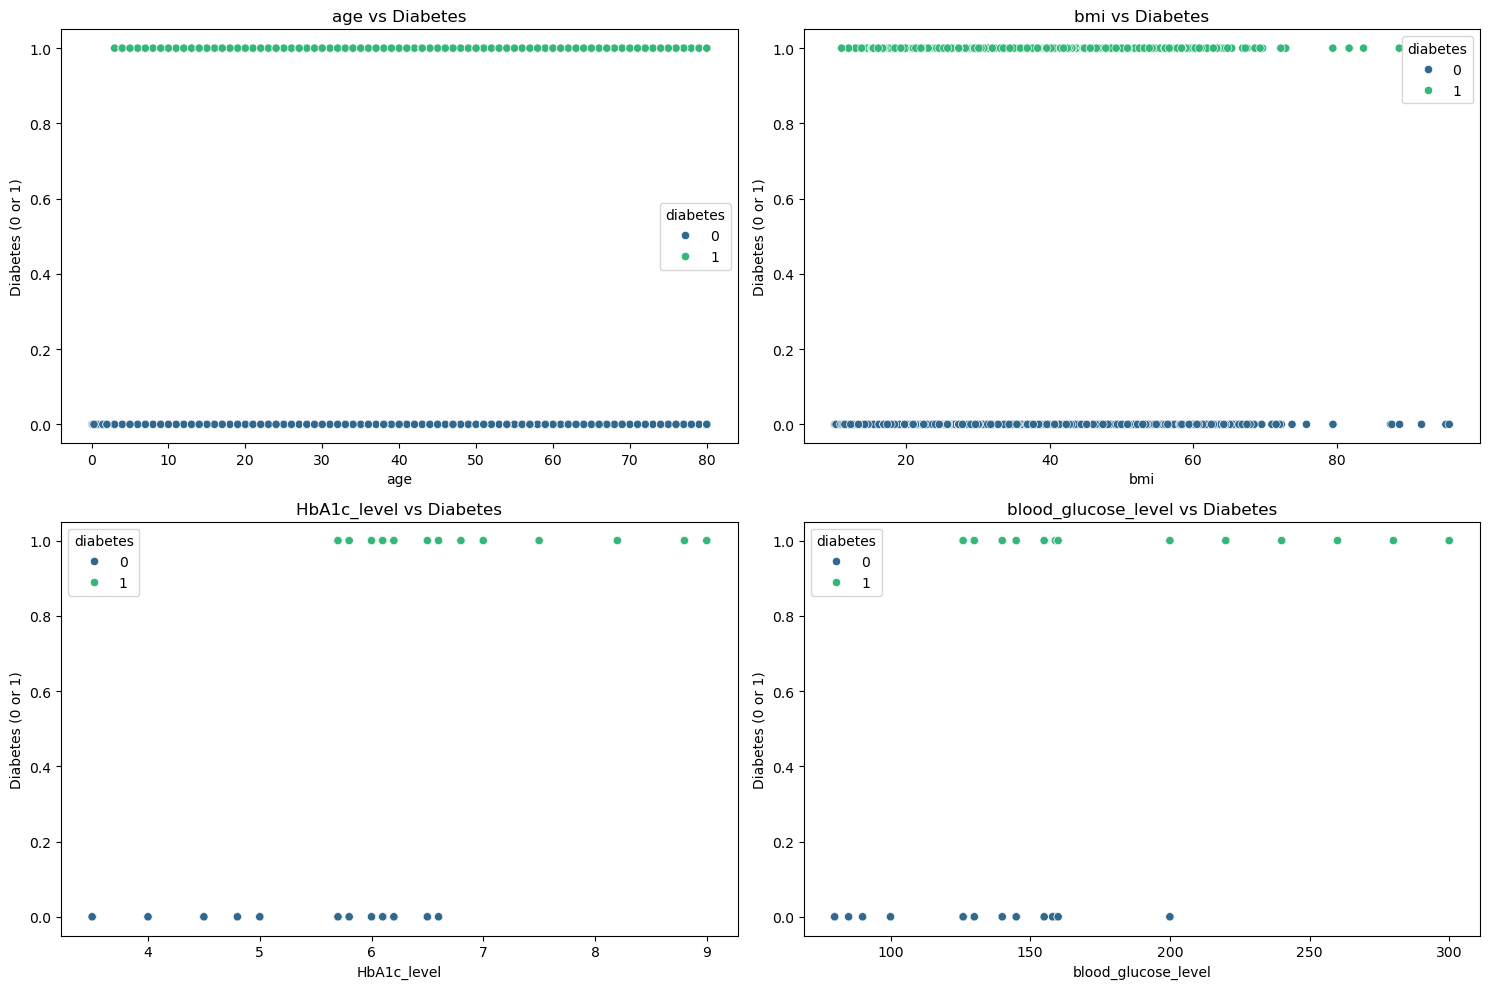

In [39]:
# Bivariate analysis 
# Scatter plots of numerical predictors vs. target (diabetes)
plt.figure(figsize=(15, 10))

for i, feature in enumerate(predictor_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=diabetes_data, x=feature, y='diabetes', hue='diabetes', palette='viridis', alpha=1)
    plt.title(f'{feature} vs Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Diabetes (0 or 1)')

plt.tight_layout()
plt.show()

### Scatter Plots of Predictors vs. Diabetes:
- **Age vs. Diabetes:** There is no strong visual relationship between age and diabetes status, indicating that age alone may not be a reliable predictor.
- **BMI vs. Diabetes:** Higher BMI values appear to have a slightly greater correlation with diabetes, though the relationship is not strictly linear.
- **HbA1c Level vs. Diabetes:** There is a clear pattern; individuals with higher HbA1c levels tend to have diabetes, as HbA1c directly relates to long-term blood sugar levels.
- **Blood Glucose Level vs. Diabetes:** Higher blood glucose levels are associated with a higher risk of diabetes, indicating a consistent trend.

### Visualisation 02: Correlation Heatmap.

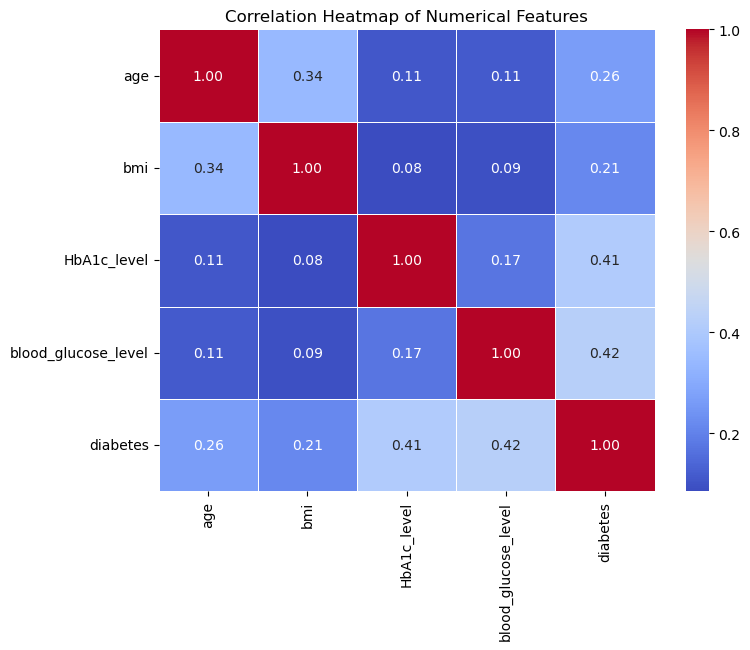

In [42]:
# Correlation heatmap for all numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = diabetes_data[numerical_features + ['diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [43]:
# Displaying numerical Data of correlation
correlation_matrix

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.344797,0.106719,0.114317,0.264927
bmi,0.344797,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.214932,0.406408,0.424336,1.000000


### Correlation Heatmap:
- **HbA1c Level and Blood Glucose Level:** There is a weak positive correlation **(r≈0.17)**, rather than the strong correlation previously mentioned. While both are blood sugar-related, they measure different aspects of blood sugar.
- **HbA1c Level and Diabetes:** There is a moderate positive correlation **(r≈0.41)**, indicating that higher HbA1c levels are associated with diabetes but not as strongly as initially thought.
- **Blood Glucose Level and Diabetes:** There is a moderate positive correlation **(r≈0.42)**, suggesting that elevated blood glucose levels are indeed associated with diabetes but to a moderate extent.
- Other predictors, such as age and bmi, show weaker correlations with diabetes **(approximately 0.26 and 0.21, respectively)**, implying that they have some influence but are not as impactful as HbA1c and blood glucose levels.

### Visualisation 03: Bar Chart

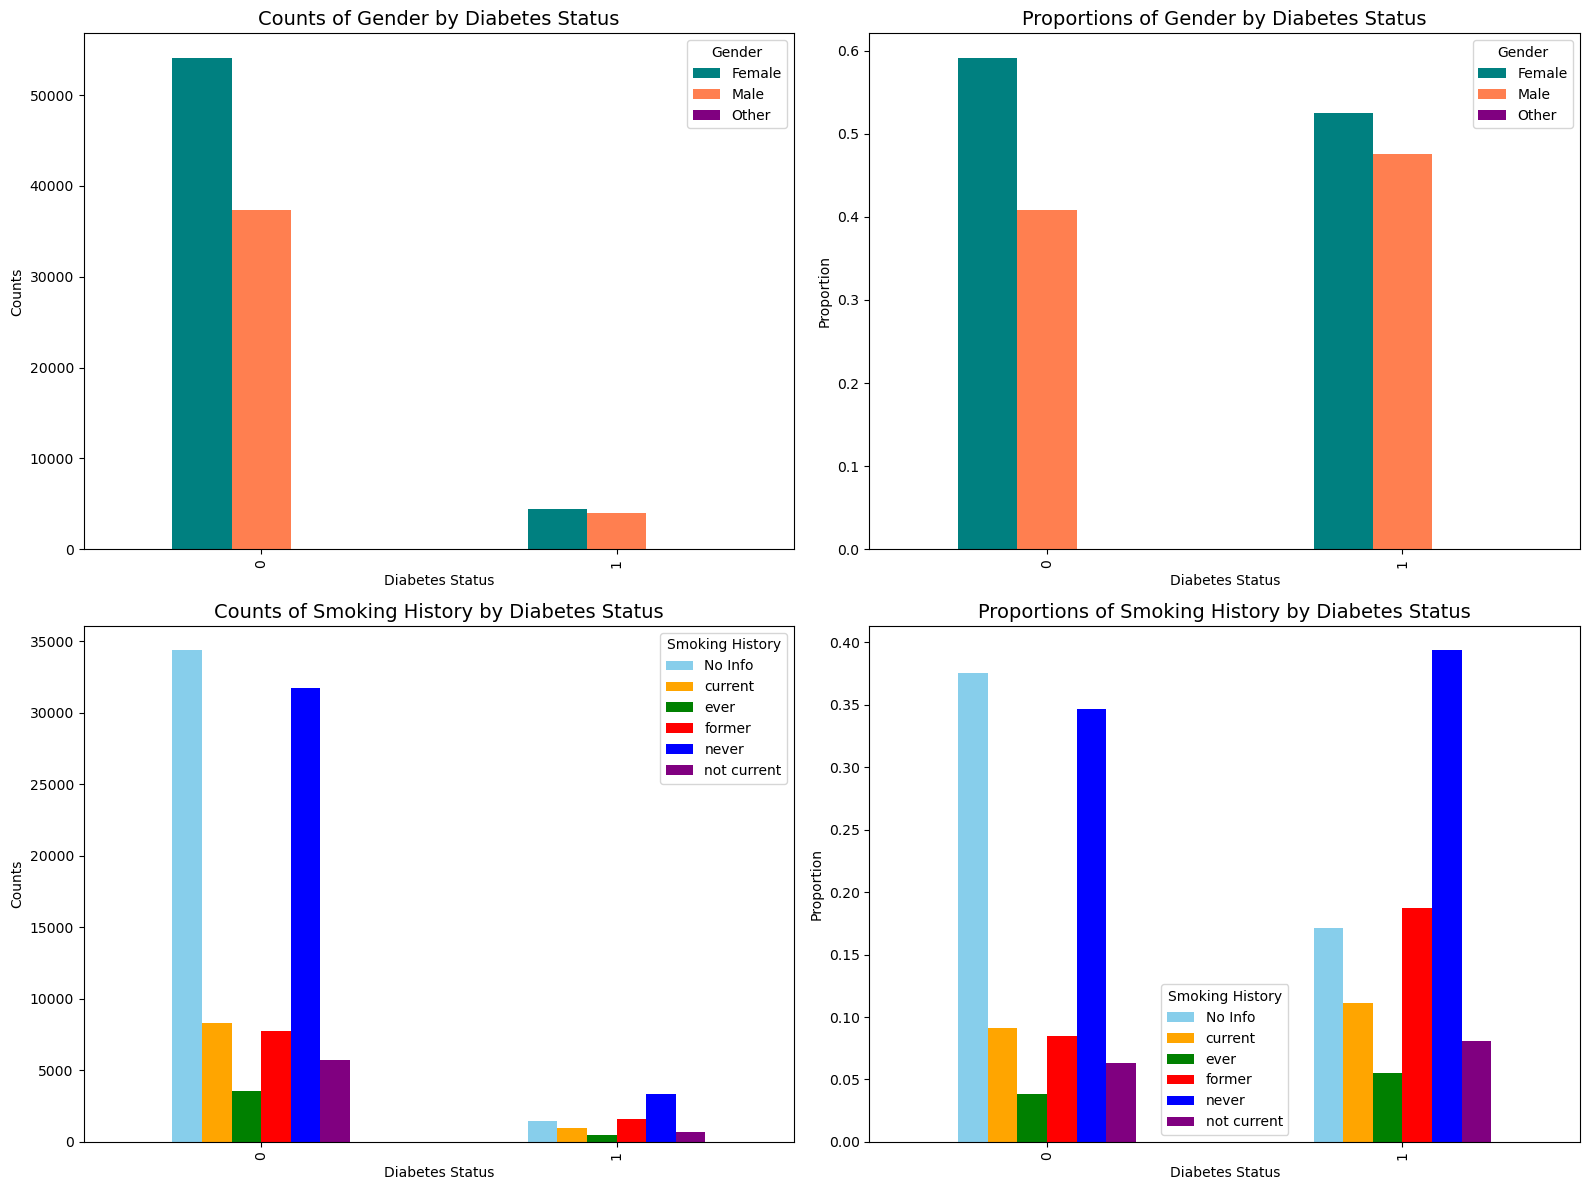

In [46]:
# Visualize counts and proportions of categorical data ('gender' and 'smoking_history') by diabetes status using bar charts

# Settin up the figure size and layout for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plotting counts for 'gender' by diabetes status
grouped_categorical_stats['gender']['Counts'].plot(kind='bar', ax=axes[0, 0], color=['teal', 'coral', 'purple'], alpha=1)
axes[0, 0].set_title('Counts of Gender by Diabetes Status', fontsize=14)
axes[0, 0].set_xlabel('Diabetes Status')
axes[0, 0].set_ylabel('Counts')
axes[0, 0].legend(title='Gender')

# Plotting proportions for 'gender' by diabetes status
grouped_categorical_stats['gender']['Proportions'].plot(kind='bar', ax=axes[0, 1], color=['teal', 'coral', 'purple'], alpha=1)
axes[0, 1].set_title('Proportions of Gender by Diabetes Status', fontsize=14)
axes[0, 1].set_xlabel('Diabetes Status')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Gender')

# Ploting counts for 'smoking_history' by diabetes status
grouped_categorical_stats['smoking_history']['Counts'].plot(kind='bar', ax=axes[1, 0], color=['skyblue', 'orange', 'green', 'red', 'blue', 'purple'], alpha=1)
axes[1, 0].set_title('Counts of Smoking History by Diabetes Status', fontsize=14)
axes[1, 0].set_xlabel('Diabetes Status')
axes[1, 0].set_ylabel('Counts')
axes[1, 0].legend(title='Smoking History')

# Plotting proportions for 'smoking_history' by diabetes status
grouped_categorical_stats['smoking_history']['Proportions'].plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'orange', 'green', 'red', 'blue', 'purple'], alpha=1)
axes[1, 1].set_title('Proportions of Smoking History by Diabetes Status', fontsize=14)
axes[1, 1].set_xlabel('Diabetes Status')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Smoking History')

plt.tight_layout()
plt.show()

### Bar Chart Visualization of Categorical Data by Diabetes Status

#### 1. Gender
- **Counts Chart:**
  - Both diabetic and non-diabetic groups have more females than males.
  - Non-diabetic individuals show a higher count overall for each gender, which is expected given their larger sample size.
- **Proportions Chart:**
  - The proportion of males in the diabetic group is slightly higher than in the non-diabetic group, suggesting a minor gender-based tendency towards diabetes.

#### 2. Smoking History
- **Counts Chart:**
  - In the non-diabetic group, most individuals are in the 'No Info' or 'never' smoking categories, with fewer individuals in other categories.
  - The diabetic group shows a notable count in the 'former' smoking category, potentially indicating a link between former smoking and diabetes.
- **Proportions Chart:**
  - Diabetic individuals have a higher proportion of 'former' smokers compared to non-diabetics, suggesting a possible association between past smoking and diabetes risk.
  - The 'No Info' category is significantly lower in the diabetic group, indicating more complete smoking history information for those diagnosed with diabetes.

## Step 07: Outliers

In [49]:
# Outlier detection using the IQR method
outlier_counts = {}
for feature in numerical_features:
    Q1 = diabetes_data[feature].quantile(0.25)
    Q3 = diabetes_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    # Calculate the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count the number of outliers for this feature
    outliers = diabetes_data[(diabetes_data[feature] < lower_bound) | (diabetes_data[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)

# Displaying the counts of outliers for each feature
outlier_counts

{'age': 0, 'bmi': 5354, 'HbA1c_level': 1312, 'blood_glucose_level': 2031}

### Transformation of outlier

In [51]:
# Applying IQR capping for outliers in the specified features: 'bmi', 'HbA1c_level', 'blood_glucose_level'

# Defining a function to cap outliers based on IQR
def cap_outliers_iqr(diabetes_data, column):
    Q1 = diabetes_data[column].quantile(0.25)
    Q3 = diabetes_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Apply capping to the feature
    diabetes_data[column] = diabetes_data[column].clip(lower=lower_bound, upper=upper_bound)

# List of features to apply IQR capping
features_to_cap = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# Capping outliers for each specified feature
for feature in features_to_cap:
    cap_outliers_iqr(diabetes_data, feature)

In [52]:
# Checking if outliers have been capped by recalculating the number of outliers
new_outlier_counts = {}
for feature in features_to_cap:
    Q1 = diabetes_data[feature].quantile(0.25)
    Q3 = diabetes_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Counting the number of remaining outliers
    outliers = diabetes_data[(diabetes_data[feature] < lower_bound) | (diabetes_data[feature] > upper_bound)]
    new_outlier_counts[feature] = len(outliers)

new_outlier_counts

{'bmi': 0, 'HbA1c_level': 0, 'blood_glucose_level': 0}

### Reasons for Capping Outliers Using IQR

1. **Preserves Data Integrity:** 
   - Capping keeps all data points intact by adjusting extremes instead of removing them, which helps maintain sample size and distribution.

2. **Reduces Impact on Statistical Measures:**
   - Limits the influence of outliers on metrics like mean and standard deviation, stabilizing variability and making the data more representative.

3. **Improves Model Performance:**
   - Reduces the effect of extreme values on models, particularly those sensitive to variance (e.g., regression, clustering), leading to more accurate and robust predictions.

# Discussion 01: Predicting Diabetes Risk Using Regression and Neural Network Models with Cross-Validation, Feature Selection, and KNN Optimization

In [55]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Converting categorical column to a numerical column using one hot encoding and Column Transformer

In [57]:
# Identifing categorical columns to one-hot encode
categorical_columns = ['smoking_history', 'gender']

In [58]:
# Using ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Droping first to avoid multicollinearity
    ],
    remainder='passthrough'  # Keeping the remaining columns as they are
)

In [59]:
# Transforming the data and rebuild the DataFrame with encoded features
data_encoded = preprocessor.fit_transform(diabetes_data)
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
other_columns = [col for col in diabetes_data.columns if col not in categorical_columns]
column_names = list(encoded_feature_names) + other_columns

In [60]:
# Rebuilding DataFrame with encoded columns
diabetes_data_encoded = pd.DataFrame(data_encoded, columns=column_names)

In [61]:
# Checking for Transformation
diabetes_data_encoded.head()

,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Male,gender_Other,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.0,0.0,0.0,27.32,5.7,158.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,76.0,1.0,1.0,20.14,4.8,155.0,0.0


## Splitting the Data

In [63]:
# Defining Features (X) and Target Variable (y)
X = diabetes_data_encoded.drop('diabetes', axis=1)
y = diabetes_data_encoded['diabetes']

In [97]:
# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67302, 13), (28844, 13), (67302,), (28844,))

### Feature selection with RFE and Logistics Regression Model

In [100]:
# Creating a Pipeline for Feature Selection with RFE and Logistic Regression
# This pipeline will perform one-hot encoding, feature selection with RFE, and logistic regression for feature ranking
rfe_pipeline = make_pipeline(
    RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=5, scoring='accuracy')
)

In [102]:
# Fitting the Pipeline for Feature Selection
rfe_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfecv',
                 RFECV(cv=5, estimator=LogisticRegression(max_iter=1000),
                       scoring='accuracy'))])

In [103]:
# Extracting selected features based on RFE results
selected_features_mask = rfe_pipeline.named_steps['rfecv'].support_
selected_features = [feature for feature, selected in zip(X.columns, selected_features_mask) if selected]

In [104]:
# Filtering the training and testing data based on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [108]:
# Displaying the Result
print("Selected Features:", selected_features)

Selected Features: ['smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current', 'gender_Male', 'gender_Other', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


### Feature Selection with RFE and Logistic Regression Model

**1. Personal Characteristics:**
- Age
- Gender (Male or Other)

**2. Smoking History:**
- Current smokers
- Former smokers
- People who have ever smoked
- Those who've never smoked
- People who are "not current" smokers

**3. Health Indicators:**
- Body Mass Index (BMI)
- HbA1c level (a measure of blood sugar over time)
- Blood glucose level
- Whether someone has hypertension (high blood pressure)
- History of heart disease

**Interpretation**:
Using Recursive Feature Elimination (RFE) with Logistic Regression, we identified 13 key features that contribute most significantly to predicting diabetes risk. These selected features include aspects of smoking history, gender, age, and health indicators such as hypertension, heart disease, BMI, HbA1c level, and blood glucose level. The presence of these features suggests they have substantial predictive power for diabetes risk.

**Reason for Feature Selection**:
Feature selection helps us focus on the most relevant data, reducing model complexity and improving efficiency. By using RFE with Logistic Regression, we can systematically eliminate less important features, thereby retaining only those that contribute meaningfully to the model's performance. This can improve the model’s ability to generalize to new data and reduce the risk of overfitting, making it more reliable for predicting diabetes risk in different populations.


## Linear Regression

In [111]:
# Training and Evaluating Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

LinearRegression()

In [113]:
# Predicting on Testing set
y_pred_lin_reg = lin_reg.predict(X_test_selected)

In [115]:
# Evaluating Linear Regression
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

In [117]:
# Displaying the Linear Regression Results
print("\nLinear Regression Results:")
print(f"MSE: {mse_lin_reg:.4f}, MAE: {mae_lin_reg:.4f}, R²: {r2_lin_reg:.4f}")


Linear Regression Results:
MSE: 0.0544, MAE: 0.1611, R²: 0.3310


#### Interpretation:
- The **MSE** of 0.0544 shows the average squared difference between what the model predicts and the actual values. Lower values are better because they mean the predictions are more accurate.
- The **MAE** of 0.1611 tells us the average amount the predictions are off from the actual values. It gives a direct measure of the average error in the predictions.
- The **R-squared** value of 0.3310 means that about 33.10% of the variation in diabetes risk can be explained by this linear model. This suggests that there is a modest relationship between the selected features and diabetes risk, but it leaves room for improvement.

#### Reason for Using Linear Regression:
- **Simple Starting Point**: Linear Regression is a basic model that helps us see if a simple linear relationship can explain diabetes risk. It’s a good first step before moving on to more complex models.
- **Easy to Understand**: The results from Linear Regression are straightforward, making it clear how each feature affects the risk. This helps us understand which factors might be important for predicting diabetes.
- **Benchmark for Comparison**: Using Linear Regression as a baseline allows us to compare its results with more advanced models. This helps us see how much benefit we gain from using models like Polynomial Regression or Neural Networks.

Overall, Linear Regression is a good starting point for understanding the data and provides a reference for evaluating more complex models.


## Polynomial Regression

In [121]:
# Training and Evaluating Polynomial Regression Model
# Transforming features for Polynomial Regression (using Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

In [123]:
# Training Polynomial Regression Model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [124]:
# Making predictions on the test set and training set
y_pred_poly_train = poly_reg.predict(X_train_poly)
y_pred_poly_test = poly_reg.predict(X_test_poly)

In [127]:
# Evaluating the Polynomial Regression model
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
mae_poly_train = mean_absolute_error(y_train, y_pred_poly_train)
r2_poly_train = r2_score(y_train, y_pred_poly_train)

mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
mae_poly_test = mean_absolute_error(y_test, y_pred_poly_test)
r2_poly_test = r2_score(y_test, y_pred_poly_test)

In [129]:
# Print Polynomial Regression results
print("\nPolynomial Regression (Degree 2):")
print(f"Training MSE: {mse_poly_train:.4f}")
print(f"Training MAE: {mae_poly_train:.4f}")
print(f"Training R-squared: {r2_poly_train:.4f}")
print(f"Test MSE: {mse_poly_test:.4f}")
print(f"Test MAE: {mae_poly_test:.4f}")
print(f"Test R-squared: {r2_poly_test:.4f}")


Polynomial Regression (Degree 2):
Training MSE: 0.0381
Training MAE: 0.1074
Training R-squared: 0.5242
Test MSE: 0.0385
Test MAE: 0.1083
Test R-squared: 0.5266


#### Interpretation:
- **Training MSE**: 0.0381 and **Test MSE**: 0.0385 shosw that the average squared error between the model's predictions and actual values is similar for both training and test data. This indicates that the model performs consistently and is not overfitting.
- **Training MAE**: 0.1074 and **Test MAE**: 0.1083 reflect the average absolute error. These close values suggest that the model is making similar errors on both the training and test sets.
- **Training R-squared**: 0.5242 and **Test R-squared**: 0.5266 mean that about 52% of the variance in diabetes risk can be explained by the polynomial model. The close R-squared values for training and test sets indicate the model generalizes well to new data.

#### Reason for Using Polynomial Regression (Degree 2):
- **Capturing Non-Linear Relationships**: Polynomial Regression allows us to model non-linear relationships between the features and diabetes risk. This can be helpful if a simple linear model doesn’t capture all the patterns in the data.
- **Improved Fit**: The higher R-squared compared to Linear Regression suggests that adding non-linear terms improves the model's ability to explain the data.
- **Comparison to Linear Models**: By trying Polynomial Regression, we can see if allowing for non-linear relationships makes a noticeable difference in prediction accuracy. This helps us decide if added complexity is worthwhile for our diabetes risk model.


## KNN Regression with GridSearchCV and Pipeline

In [133]:
# KNN Regression with Pipeline and GridSearchCV
knn_reg_pipeline = make_pipeline(KNeighborsRegressor())
param_grid_knn_reg = {'kneighborsregressor__n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13, 14, 15]}
grid_search_knn_reg = GridSearchCV(knn_reg_pipeline, param_grid_knn_reg, cv=5, scoring='r2')
grid_search_knn_reg.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__n_neighbors': [3, 5, 7, 9, 10,
                                                              11, 12, 13, 14,
                                                              15]},
             scoring='r2')

In [134]:
# Evaluating KNN Regression
best_knn_reg = grid_search_knn_reg.best_estimator_
y_pred_knn_reg = best_knn_reg.predict(X_test_selected)
mse_knn = mean_squared_error(y_test, y_pred_knn_reg)
mae_knn = mean_absolute_error(y_test, y_pred_knn_reg)
r2_knn = r2_score(y_test, y_pred_knn_reg)

In [135]:
# Displaying the results of KNN Regression 
print("\nKNN Regression Results:")
print(f"Optimal k: {grid_search_knn_reg.best_params_['kneighborsregressor__n_neighbors']}")
print(f"MSE: {mse_knn:.4f}, MAE: {mae_knn:.4f}, R²: {r2_knn:.4f}")


KNN Regression Results:
Optimal k: 10
MSE: 0.0381, MAE: 0.0673, R²: 0.5312


#### Interpretation:
- **Optimal k**: The best value for `k` is 10, meaning that the model uses the 10 nearest neighbors to make predictions.
- **MSE**: 0.0381 indicates the average squared error between the model’s predictions and actual values. This is relatively low, suggesting that the model has a good fit.
- **MAE**: 0.0673 reflects the average absolute error, showing that the predictions are, on average, close to the actual values.
- **R-squared**: 0.5312 means that about 53% of the variance in diabetes risk is explained by the model. This is a decent level of accuracy, indicating that KNN Regression is capturing some important patterns in the data.

#### Reason for Using KNN Regression:
KNN Regression is useful because it makes predictions based on the similarity of data points, without assuming a specific relationship between features. This non-parametric approach can capture complex patterns that linear models might miss, as it relies on the average outcome of the nearest neighbors instead of fitting a strict equation. By testing KNN, we can compare how well a model based on proximity performs relative to Linear and Polynomial Regression. This comparison helps us determine whether using the information from similar cases provides a better understanding of diabetes risk than other, more structured models.


## KNN Classification with Pipeline and GridSearchCV

In [140]:
# KNN Classification with Pipeline and GridSearchCV
knn_clf_pipeline = make_pipeline(KNeighborsClassifier())
param_grid_knn_clf = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 10, 11], 'kneighborsclassifier__weights': ['uniform', 'distance']}
grid_search_knn_clf = GridSearchCV(knn_clf_pipeline, param_grid_knn_clf, cv=5, scoring='f1')
grid_search_knn_clf.fit(X_train_selected, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 10,
                                                               11],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='f1')

In [141]:
# Evaluating KNN Classification
best_knn_clf = grid_search_knn_clf.best_estimator_
y_pred_knn_clf = best_knn_clf.predict(X_test_selected)
acc_knn_clf = accuracy_score(y_test, y_pred_knn_clf)
f1_knn_clf = f1_score(y_test, y_pred_knn_clf)
auc_knn_clf = roc_auc_score(y_test, best_knn_clf.predict_proba(X_test_selected)[:, 1])

In [142]:
# Displaying the results of KNN Classification 
print("\nKNN Classification Results:")
print(f"Optimal k: {grid_search_knn_clf.best_params_['kneighborsclassifier__n_neighbors']}")
print(f"Accuracy: {acc_knn_clf:.4f}, F1 Score: {f1_knn_clf:.4f}, AUC: {auc_knn_clf:.4f}")


KNN Classification Results:
Optimal k: 3
Accuracy: 0.9499, F1 Score: 0.6702, AUC: 0.8479


#### Interpretation:
- **Optimal k**: The best value for `k` is 3, meaning the model uses the 3 nearest neighbors to classify diabetes risk.
- **Accuracy**: 0.9499 indicates that about 95% of the predictions match the actual labels. This shows the model is quite accurate overall.
- **F1 Score**: 0.6702 reflects the balance between precision and recall, suggesting that the model has a reasonable balance between identifying positive cases and minimizing false positives.
- **AUC**: 0.8479 represents the model's ability to distinguish between positive and negative classes. A score close to 1.0 indicates a strong ability to correctly classify diabetes risk.

#### Reason for Using KNN Classification:
KNN Classification is valuable because it leverages the proximity of similar cases to predict diabetes risk, making it adaptable to various patterns in the data without needing a predefined relationship. The model classifies each new case based on the majority class among its nearest neighbors, which can be particularly effective when dealing with complex, non-linear patterns. By exploring KNN Classification, we gain insights into how well this neighbor-based approach can differentiate between high-risk and low-risk cases compared to other models. This helps us evaluate whether local patterns provide a reliable method for predicting diabetes risk.


## Neural Network Model

In [147]:
# Neural Network Model Training and Evaluation
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_selected.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [149]:
# Compiling Neural Network Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [151]:
# Training the Neural Network
history = nn_model.fit(X_train_selected, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8961 - loss: 0.4178 - val_accuracy: 0.9244 - val_loss: 0.2133
Epoch 2/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9220 - loss: 0.2303 - val_accuracy: 0.9227 - val_loss: 0.2198
Epoch 3/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9281 - loss: 0.1953 - val_accuracy: 0.9434 - val_loss: 0.1554
Epoch 4/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9392 - loss: 0.1689 - val_accuracy: 0.9177 - val_loss: 0.2230
Epoch 5/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9417 - loss: 0.1604 - val_accuracy: 0.9481 - val_loss: 0.1534
Epoch 6/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9451 - loss: 0.1512 - val_accuracy: 0.9517 - val_loss: 0.1361
Epoch 7/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9485 - loss: 0.1431 - val_accuracy: 0.9590 - val_loss: 0.1212
Epoch 8/100
3366/3366 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9500 - loss: 0

In [152]:
# Evaluating Neural Network
y_pred_nn = (nn_model.predict(X_test_selected) > 0.5).astype("int32")
acc_nn = accuracy_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, nn_model.predict(X_test_selected))

902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
902/902 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step


In [153]:
# Displaying the Results of Neural Network
print("\nNeural Network Results:")
print(f"Accuracy: {acc_nn:.4f}, F1 Score: {f1_nn:.4f}, AUC: {auc_nn:.4f}")


Neural Network Results:
Accuracy: 0.9583, F1 Score: 0.7171, AUC: 0.9631


#### Interpretation:
- **Accuracy**: 0.9583 means that about 96% of the predictions are correct, indicating a high level of overall accuracy for the model.
- **F1 Score**: 0.7171 suggests a good balance between precision and recall, indicating the model effectively identifies true positive cases while minimizing false positives.
- **AUC**: 0.9631 indicates the model’s strong ability to distinguish between positive and negative cases. An AUC score close to 1.0 shows excellent classification performance in predicting diabetes risk.

#### Reason for Using a Neural Network:
Neural Networks are powerful because they can capture complex patterns in data by learning multiple layers of relationships, making them well-suited for tasks with intricate, non-linear patterns like diabetes risk prediction. Neural Networks can adjust to a variety of data structures by learning through many iterations, which helps them improve accuracy and handle more complexity than simpler models. By using a Neural Network, we can test whether these deeper layers


## Comparative Analysis 

In [160]:
# Comparative Analysis
print("\nComparative Analysis:")
print(f"Linear Regression - MSE: {mse_lin_reg:.4f}, R²: {r2_lin_reg:.4f}")
print(f"Polynomial Regression - MSE: {mse_poly_test:.4f}, R²: {r2_poly_test:.4f}")
print(f"KNN Regression - MSE: {mse_knn:.4f}, R²: {r2_knn:.4f}")
print(f"KNN Classification - Accuracy: {acc_knn_clf:.4f}, F1 Score: {f1_knn_clf:.4f}, AUC: {auc_knn_clf:.4f}")
print(f"Neural Network - Accuracy: {acc_nn:.4f}, F1 Score: {f1_nn:.4f}, AUC: {auc_nn:.4f}")


Comparative Analysis:
Linear Regression - MSE: 0.0544, R²: 0.3310
Polynomial Regression - MSE: 0.0385, R²: 0.5266
KNN Regression - MSE: 0.0381, R²: 0.5312
KNN Classification - Accuracy: 0.9499, F1 Score: 0.6702, AUC: 0.8479
Neural Network - Accuracy: 0.9583, F1 Score: 0.7171, AUC: 0.9631


#### Comparative Analysis Interpretation:
- **Linear Regression**: MSE of 0.0544 and R² of 0.3310 indicate that while this model captures some relationship in the data, it explains only about 33% of the variance, suggesting limited predictive power.
- **Polynomial Regression**: With an MSE of 0.0385 and R² of 0.5266, Polynomial Regression performs better than Linear Regression, explaining approximately 53% of the variance. This shows that incorporating non-linear terms improves the model’s accuracy.
- **KNN Regression**: This model achieves an MSE of 0.0381 and an R² of 0.5312, slightly outperforming Polynomial Regression. The low MSE and higher R² imply that KNN Regression captures complex patterns more effectively.
- **KNN Classification**: An Accuracy of 0.9499, F1 Score of 0.6702, and AUC of 0.8479 show that KNN Classification provides solid performance, particularly in balancing true positive and false positive rates, which is useful for classification tasks.
- **Neural Network**: The highest accuracy of 0.9583, F1 Score of 0.7171, and AUC of 0.9631 suggest that the Neural Network is the most effective model for predicting diabetes risk. It captures complex patterns with high accuracy and strong differentiation between classes.

#### Best Performing Model:
Based on the analysis, the **Neural Network** model performed the best. It achieved the highest accuracy and AUC, demonstrating superior predictive power and the ability to differentiate between high and low diabetes risk cases. The Neural Network’s ability to learn complex, non-linear relationships makes it the most effective choice for this task.

#### Reason for Conducting Comparative Analysis:
Comparing these models helps us understand how well each approach captures the patterns in diabetes risk data and performs on both regression and classification tasks. By evaluating metrics like MSE and R² for regression models and accuracy, F1 score, and AUC for classification models, we can identify the strengths and weaknesses of each model. This comparison is essential to determine which model provides the best balance between accuracy and generalization, helping us choose the most effective model for predicting diabetes risk and making informed healthcare decisions.


## Checking for Overfitting on Neural Network Model

**We are checking the overfitting on neural network model because it is the best performing model, compared to all other models.**

In [178]:
# Neural Network Model
train_acc_nn = accuracy_score(y_train, (nn_model.predict(X_train_selected) > 0.5).astype("int32"))
test_acc_nn = accuracy_score(y_test, y_pred_nn)

# Displaying the result
print("\nNeural Network Overfitting Check:")
print(f"Training Accuracy: {train_acc_nn:.4f}")
print(f"Test Accuracy: {test_acc_nn:.4f}")
if train_acc_nn > test_acc_nn:
    print("Possible overfitting detected (Training Accuracy > Test Accuracy)")

2104/2104 ━━━━━━━━━━━━━━━━━━━━ 2s 951us/step

Neural Network Overfitting Check:
Training Accuracy: 0.9586
Test Accuracy: 0.9583
Possible overfitting detected (Training Accuracy > Test Accuracy)


#### Interpretation:
- **Training Accuracy**: 0.9586 indicates that the model performs very well on the training data, correctly predicting around 96% of the cases.
- **Test Accuracy**: 0.9583 shows that the model’s performance on unseen data is nearly identical to its performance on the training data, with only a slight difference.
- **Overfitting Indicator**: The minimal difference between training and test accuracy suggests that the model may not be significantly overfitting. While the training accuracy is slightly higher than the test accuracy, this difference is very small, indicating that the model generalizes well to new data.

#### Reason for Checking Overfitting:
Checking for overfitting is important to ensure that the Neural Network model not only performs well on the training data but also generalizes effectively to new data. By comparing training and test accuracy, we can assess whether the model has learned to capture the true patterns in the data rather than memorizing specifics of the training set. This step helps confirm that the model’s high accuracy is reliable and can be expected to work well on real-world cases of diabetes risk prediction.

#### Why we are not improving the model?
Because there is only a minimal difference between the training and test accuracy for the Neural Network model, it indicates that the model is generalizing well and not significantly overfitting.


### Overall Summary: Predicting Diabetes Risk Using Regression and Neural Network Models with Cross-Validation, Feature Selection, and KNN Optimization

#### Purpose of the Analysis:
The goal of t analysisect was to develop a reliable model for predicting diabetes risk by exploring various mach-ne learning techniques. We used different models, including Linear Regression, Polynomial Regression, KNN Regression, KNN Classification, and Neural Networks. Our focus was on evaluating and comparing these models to determine which one provides the most accurate and reliable predictions.

#### Why We Used These Techniques:
1. **Cross-Validation**: Cross-validation allowed us to evaluate model performance consistently across different subsets of the data. This helps ensure that the model can generalize well and isn’t overly dependent on a specific dataset split.

2. **Feature Selection**: Using Recursive Feature Elimination (RFE), we identified the most important features for predicting diabetes risk. This helped simplify the models by focusing only on relevant factors, which improves accuracy and reduces overfitting.

3. **KNN Optimization**: We optimized the KNN models by testing different values of `k`. This helped us understand how well a neighbor-based approach could capture patterns in the data compared to regression and neural network models.

4. **Model Comparison**: By testing various models, we could compare their performance and choose the best one for diabetes risk prediction. This comparison also helped us understand which models handle complex relationships better and which ones are easier to interpret.

5. **Neural Networks**: Neural Networks were included to see if a more complex model with hidden layers could capture patterns that simpler models might miss. This helped us understand whether added complexity leads to better accuracy and reliability for diabetes prediction.

#### Key Findings:
- The Neural Network model performed the best, showing high accuracy and strong ability to distinguish between high-risk and low-risk cases.
- The KNN models provided useful insights, especially for classification, but they did not outperform the Neural Network.
- Regression models, while simpler, were helpful as a starting point to understand basic relationships in the data and set a baseline for comparison.

#### Conclusion:
This analysis demonstrates the importance of using multiple techniques to find the most effective model for predicting diabetes risk. By comparing various models and focusing on feature selection, cross-validation, and optimization, we were able to build a model that balances accuracy and generalization. The Neural Network emerged as the most reliable choice, capturing complex patterns in diabetes risk data. This approach can be applied to other healthcare predictions, providing a robust foundation for making informed decisions based on machine learning insights.


# Discussion 02: Identifying Key Risk Factors for Diabetes Using GaussianNB, CategoricalNB, and Bayesian Network Analysis

In [282]:
# Importing necessary libraries 
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination

## Gaussian Naive Bayes for Diabetes Risk Prediction

In [214]:
# Continuous features for GaussianNB
X_train_continuous = X_train[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
X_test_continuous = X_test[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

In [253]:
# Train GaussianNB on continuous features
gnb = GaussianNB()
gnb.fit(X_train_continuous, y_train)

GaussianNB()

In [255]:
# Making Predictions
y_pred_gnb = gnb.predict(X_test_continuous)

In [257]:
# Evaluating the Model using common metrics
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_precision = precision_score(y_test, y_pred_gnb)
gnb_recall = recall_score(y_test, y_pred_gnb)
gnb_f1 = f1_score(y_test, y_pred_gnb)
gnb_auc = roc_auc_score(y_test, gnb.predict_proba(X_test_continuous)[:, 1])

In [259]:
# Displaying the results
print("GaussianNB Results on Continuous Features:")
print(f"Accuracy: {gnb_accuracy:.4f}, Precision: {gnb_precision:.4f}, Recall: {gnb_recall:.4f}, F1 Score: {gnb_f1:.4f}, AUC: {gnb_auc:.4f}")


GaussianNB Results on Continuous Features:
Accuracy: 0.9032, Precision: 0.4684, Recall: 0.6174, F1 Score: 0.5326, AUC: 0.9214


### Interpretation
- **Accuracy**: The model correctly predicts the outcome for 90.32% of cases, indicating good overall performance.
- **Precision**: With a precision of 0.4684, the model has a moderate rate of correctly identifying true diabetes cases among all positive predictions.
- **Recall**: A recall of 0.6174 suggests that the model correctly identifies 61.74% of actual diabetes cases, which indicates that it successfully catches a fair number of true positives.
- **F1 Score**: The F1 Score of 0.5326 is the harmonic mean of precision and recall, reflecting a balance between these two metrics. Here, it indicates that the model is moderately effective in balancing true positives and false positives.
- **AUC**: An AUC of 0.9214 means that the model has a high ability to distinguish between individuals with and without diabetes. This suggests strong discriminatory power.

### Reason for Using Gaussian Naive Bayes
- **Handling Continuous Features**: GaussianNB is particularly suited for continuous data as it assumes a normal distribution for each feature. This makes it a good fit for variables like 'age', 'bmi', and 'blood_glucose_level'.
- **Simplicity and Interpretability**: GaussianNB is a straightforward probabilistic model that is easy to interpret, allowing us to directly understand the influence of each feature on diabetes risk.
- **Baseline for Comparison**: Using GaussianNB provides a baseline for evaluating more complex models. It helps us understand how well a simple probabilistic approach can predict diabetes risk based on continuous data before moving to more sophisticated techniques.

This model offers a quick and interpretable way to analyze continuous data features, and these results help in identifying the strengths and limitations of using Gaussian Naive Bayes for diabetes prediction.


## Categorical Naive Bayes on One-Hot Encoded Features

In [262]:
# One-hot encoded categorical features for CategoricalNB
X_train_categorical = X_train.drop(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1)
X_test_categorical = X_test.drop(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level'], axis=1)


In [264]:
# Training CategoricalNB on one-hot encoded categorical features
cnb = CategoricalNB()
cnb.fit(X_train_categorical, y_train)

CategoricalNB()

In [266]:
# Making predictions
y_pred_cnb = cnb.predict(X_test_categorical)

In [268]:
# Evaluating the Model using common metrics
cnb_accuracy = accuracy_score(y_test, y_pred_cnb)
cnb_precision = precision_score(y_test, y_pred_cnb)
cnb_recall = recall_score(y_test, y_pred_cnb)
cnb_f1 = f1_score(y_test, y_pred_cnb)
cnb_auc = roc_auc_score(y_test, cnb.predict_proba(X_test_categorical)[:, 1])

In [275]:
# Displaying the evaluation results
print("CategoricalNB Results on Categorical Features:")
print(f"Accuracy: {cnb_accuracy:.4f}, Precision: {cnb_precision:.4f}, Recall: {cnb_recall:.4f}, F1 Score: {cnb_f1:.4f}, AUC: {cnb_auc:.4f}")

CategoricalNB Results on Categorical Features:
Accuracy: 0.9107, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, AUC: 0.6141


### Interpretation
- **Accuracy**: The model achieved an accuracy of 91.07%, suggesting that it makes correct predictions for the majority of cases overall.
- **Precision**: With a precision of 0.0000, the model did not correctly identify any true positive cases among its positive predictions, indicating potential issues with identifying diabetes cases specifically.
- **Recall**: A recall of 0.0000 implies that the model failed to capture any actual diabetes cases, which is a significant limitation.
- **F1 Score**: The F1 Score is also 0.0000, reflecting the model’s poor balance between precision and recall. This is due to the fact that it did not correctly predict any diabetes cases.
- **AUC**: The AUC of 0.614 shows a limited ability to distinguish between individuals with and without diabetes, which means the model struggles to identify positive cases effectively.

### Reason for Using Categorical Naive Bayes
- **Handling Categorical Data**: CategoricalNB is specifically designed for categorical data and can handle one-hot encoded features like 'smoking_history' and 'gender' without assuming a continuous distribution.
- **Understanding Categorical Influences**: Using CategoricalNB helps in understanding how different categories contribute to diabetes risk. It provides insights into which categories may or may not be associated with higher risks.
- **Baseline Performance**: This model gives a baseline for comparison when dealing with categorical features. It helps identify if categorical predictors are useful on their own or if they need to be combined with continuous data for a more accurate prediction.

While CategoricalNB is suitable for categorical data, these results indicate that the current categorical features may not be strong predictors of diabetes on their own. This suggests exploring combined approaches or refining feature selection.


## Bayesian Network Analysis for Risk Prediction

In [278]:
# Combining continuous and categorical features for Bayesian Network
X_combined = pd.concat([X_train_continuous, X_train_categorical], axis=1)
X_combined['diabetes'] = y_train  # Adding the target variable back for structure learning

In [286]:
# Defining the scoring method
scoring_method = BicScore(X_combined)

In [306]:
# Creating and fitting the Bayesian Network using Hill-Climb Search
hc = HillClimbSearch(X_combined)
best_model = hc.estimate(scoring_method=scoring_method)

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [308]:
# Fitting the Bayesian Network
bayesian_network = BayesianNetwork(best_model.edges())
bayesian_network.fit(X_combined)

In [328]:
# Displaying the structure of the Bayesian Network
print("Bayesian Network Structure:")
for edge in bayesian_network.edges():
    print(edge)

Bayesian Network Structure:
('age', 'hypertension')
('age', 'heart_disease')
('age', 'smoking_history_former')
('age', 'smoking_history_never')
('hypertension', 'smoking_history_current')
('hypertension', 'smoking_history_ever')
('heart_disease', 'gender_Male')
('smoking_history_former', 'smoking_history_current')
('smoking_history_former', 'smoking_history_not current')
('smoking_history_former', 'smoking_history_ever')
('smoking_history_never', 'smoking_history_former')
('smoking_history_never', 'smoking_history_current')
('smoking_history_never', 'smoking_history_not current')
('smoking_history_never', 'smoking_history_ever')
('smoking_history_never', 'gender_Male')
('smoking_history_current', 'smoking_history_not current')
('smoking_history_ever', 'smoking_history_current')
('smoking_history_ever', 'smoking_history_not current')
('HbA1c_level', 'diabetes')
('diabetes', 'blood_glucose_level')
('diabetes', 'age')
('diabetes', 'smoking_history_not current')
('smoking_history_not curre

### Interpretation of the Bayesian Network Structure
- The Bayesian Network structure reveals dependencies among the variables related to diabetes risk. For instance, 'HbA1c_level' directly influences 'diabetes,' suggesting a strong link between this feature and the risk of developing diabetes.
- The presence of dependencies between 'diabetes' and variables like 'age' and 'blood_glucose_level' highlights the importance of these variables in assessing diabetes risk.
- Dependencies among smoking history categories (e.g., 'smoking_history_never,' 'smoking_history_current') and other factors like 'hypertension' and 'heart_disease' indicate how lifestyle and health conditions interact and potentially influence diabetes risk.

### How Evidence Variables Were Selected
- **Dependency on 'diabetes'**: Evidence variables were chosen based on their direct connection or influence on 'diabetes' in the network. For instance, 'HbA1c_level' and 'blood_glucose_level' were selected due to their direct influence on 'diabetes' in the network.
- **Significance in Health Context**: 'Age' was chosen as it is known to affect diabetes risk and also appears connected to 'diabetes' in the structure. Smoking history factors such as 'smoking_history_never' and 'smoking_history_not current' were also included due to their dependencies with other health-related variables.
- **Practical Relevance**: Variables like 'hypertension' and 'heart_disease' were indirectly associated with 'diabetes' through other factors. These connections justify including them in the network for a comprehensive assessment.

Overall, the evidence variables were selected by identifying the strongest direct and indirect relationships with 'diabetes,' which helps capture a complete picture of diabetes risk in relation to other variables.


In [413]:
# Checking the state names for each variable
print(bayesian_network.get_cpds('HbA1c_level'))
print(bayesian_network.get_cpds('blood_glucose_level'))
print(bayesian_network.get_cpds('age'))
print(bayesian_network.get_cpds('smoking_history_not current'))

+------------------+------------+
| HbA1c_level(3.5) | 0.0747972  |
+------------------+------------+
| HbA1c_level(4.0) | 0.0751092  |
+------------------+------------+
| HbA1c_level(4.5) | 0.0763722  |
+------------------+------------+
| HbA1c_level(4.8) | 0.0754807  |
+------------------+------------+
| HbA1c_level(5.0) | 0.0745892  |
+------------------+------------+
| HbA1c_level(5.7) | 0.0852724  |
+------------------+------------+
| HbA1c_level(5.8) | 0.0823155  |
+------------------+------------+
| HbA1c_level(6.0) | 0.0834745  |
+------------------+------------+
| HbA1c_level(6.1) | 0.080696   |
+------------------+------------+
| HbA1c_level(6.2) | 0.0827464  |
+------------------+------------+
| HbA1c_level(6.5) | 0.0846186  |
+------------------+------------+
| HbA1c_level(6.6) | 0.0844997  |
+------------------+------------+
| HbA1c_level(6.8) | 0.00655255 |
+------------------+------------+
| HbA1c_level(7.0) | 0.00658227 |
+------------------+------------+
| HbA1c_level(

In [433]:
# Performing inference using the directly connected variables as evidence
evidence_variables = {
    'HbA1c_level': 5.7,   
    'blood_glucose_level': 130.0,   
    'age': 67,  
    'smoking_history_not current': 1,
}

### Reason for Choosing Evidence Variables

1. **HbA1c Level (5.7)**:
   - HbA1c is a crucial marker for diabetes, reflecting average blood sugar levels over several months. An HbA1c level of 5.7 indicates prediabetes, making it an important variable for assessing diabetes risk in this context.
   
2. **Blood Glucose Level (130.0)**:
   - Blood glucose levels directly reflect current blood sugar levels. A reading of 130.0 mg/dL is within the range indicating impaired fasting glucose, which is another risk factor for diabetes. This value was selected to analyze its effect on diabetes risk.

3. **Age (67)**:
   - Age is a significant risk factor for diabetes, with older individuals generally at higher risk. The age of 67 was chosen as it falls within a range where diabetes risk tends to be higher, providing insights into age-related diabetes risk.

4. **Smoking History (Not Current)**:
   - Smoking habits are linked to various health conditions, including diabetes. A "not current" smoking status reflects someone who has likely quit smoking, and this history can impact long-term health outcomes. Including this variable helps capture the influence of lifestyle changes on diabetes risk.

These evidence variables were chosen for their strong connections to diabetes risk, as well as their practical significance in understanding how various health indicators and lifestyle factors contribute to the likelihood of developing diabetes.


In [436]:
# Performing inference using the selected evidence variables
inference = VariableElimination(bayesian_network)
result = inference.query(variables=['diabetes'], evidence=evidence_variables)

In [438]:
# Displaying the result
print("Inference with Selected Evidence Variables:")
print(result)

Inference with Selected Evidence Variables:
+---------------+-----------------+
| diabetes      |   phi(diabetes) |
+===============+=================+
| diabetes(0.0) |          0.6068 |
+---------------+-----------------+
| diabetes(1.0) |          0.3932 |
+---------------+-----------------+


### Inference with Selected Evidence Variables

1. **Interpretation**:
   - The inference results indicate that, given the selected evidence variables, the probability of not having diabetes (diabetes(0.0)) is 60.68%, while the probability of having diabetes (diabetes(1.0)) is 39.32%.
   - This suggests that while the individual has a slightly higher likelihood of not having diabetes, there is still a considerable risk, with a nearly 40% probability of being diabetic based on the chosen evidence variables.

2. **Reason for Conducting Inference**:
   - Performing inference with these specific variables allows us to assess diabetes risk by incorporating relevant health indicators such as HbA1c, blood glucose level, age, and smoking history. 
   - By understanding the impact of these factors, healthcare professionals can gain insights into how these variables collectively influence diabetes risk, enabling better-informed decisions on prevention and management strategies.
   - Additionally, this approach helps identify high-risk profiles that might benefit from closer monitoring or intervention, contributing to more personalized healthcare.

This probabilistic analysis provides a detailed view of how certain health indicators and lifestyle factors impact diabetes risk, assisting in targeted and data-driven healthcare strategies.


### Comparative Analysis

In [404]:
# Comparative Analysis
print("\nComparative Analysis of Models:")
print("GaussianNB (Continuous) - Accuracy: {:.4f}, F1 Score: {:.4f}, AUC: {:.4f}".format(gnb_accuracy, gnb_f1, gnb_auc))
print("CategoricalNB (Categorical) - Accuracy: {:.4f}, F1 Score: {:.4f}, AUC: {:.4f}".format(cnb_accuracy, cnb_f1, cnb_auc))

# Insights from Bayesian Network
print("\nBayesian Network Insights:")
print("The Bayesian Network revealed feature interdependencies and how combinations influence diabetes risk.")



Comparative Analysis of Models:
GaussianNB (Continuous) - Accuracy: 0.9032, F1 Score: 0.5326, AUC: 0.9214
CategoricalNB (Categorical) - Accuracy: 0.9107, F1 Score: 0.0000, AUC: 0.6141

Bayesian Network Insights:
The Bayesian Network revealed feature interdependencies and how combinations influence diabetes risk.


### Interpretation

- **Model Performance**: GaussianNB performed better overall compared to CategoricalNB, especially in terms of AUC, which indicates its stronger ability to correctly classify diabetes cases based on continuous features like HbA1c level and blood glucose level.
- **Understanding Feature Relationships**: The Bayesian Network provided deeper insights into how different features interact and influence diabetes risk. This approach is useful for exploring complex dependencies, helping to better inform health professionals about the most impactful risk factors.


#### Overview
In this analysis, we explored three approaches to understanding diabetes risk factors: **Gaussian Naive Bayes (GaussianNB)** for continuous features, **Categorical Naive Bayes (CategoricalNB)** for categorical features, and **Bayesian Network Analysis** to uncover interdependencies between features. The goal was to leverage these models to identify which factors contribute most to diabetes risk and how these factors interact with each other.

#### Reason
- **GaussianNB**: We used this to focus on continuous features, such as blood glucose levels and HbA1c levels, to see how these numbers relate to diabetes risk.
- **CategoricalNB**: This was used to understand the impact of categorical features, like smoking habits and gender. Though it didn’t perform as well, it gave us an idea of which categorical factors may matter.
- **Bayesian Network Analysis**: This method helped us see how different factors are related and how they work together to influence diabetes risk. Unlike the other models, it showed us a bigger picture by looking at how factors like age and smoking history combine to impact diabetes.

#### Key Findings
- **GaussianNB** performed well with a high accuracy and AUC, making it good for identifying diabetes risk based on continuous health data.
- **CategoricalNB** showed that categorical features are harder to analyze, especially with precision and recall, indicating we might need to explore different ways of handling these types of data.
- **Bayesian Network** helped us understand how features interact, showing that factors like age, smoking, and blood sugar levels work together in determining diabetes risk.

#### Conclusion
This multi-model approach helped us to:
1. **Identify Important Factors**: GaussianNB helped us find the key continuous variables related to diabetes, while the Bayesian Network showed how different factors relate to each other.
2. **See How Factors Work Together**: The Bayesian Network gave us a clearer understanding of how factors combine to influence risk, showing a fuller picture than individual models could.
3. **Point to Next Steps**: This analysis suggests that future work could explore how to better integrate continuous and categorical data and improve how we handle categorical features.

Overall, combining these methods gives a more complete understanding of diabetes risk, which could be valuable in designing better ways to prevent and manage diabetes.


### Overall Summary of Diabetes Risk Data Analysis

#### Project Overview
The goal of this analysis was to understand the factors that influence diabetes risk and to evaluate which models are best for predicting this risk. We used various models, including **Linear Regression**, **Polynomial Regression**, **K-Nearest Neighbors (KNN)** for both regression and classification, **Neural Networks**, **GaussianNB**, **CategoricalNB**, and **Bayesian Network Analysis**. Each model helped us see different aspects of the data and provided insights into how diabetes risk can be predicted.

#### Key Steps and Models Used
1. **Feature Selection**: We started by identifying important features using Recursive Feature Elimination (RFE). This step helped us focus on the most relevant data for better model accuracy.
  
2. **Linear and Polynomial Regression**: These models helped establish a baseline for prediction. Polynomial Regression, in particular, captured non-linear relationships, which improved accuracy over simple Linear Regression.

3. **K-Nearest Neighbors (KNN)**:
   - **KNN Regression**: Evaluated the relationship between features and diabetes risk in a straightforward manner.
   - **KNN Classification**: Helped classify individuals as at risk or not, with accuracy and F1 scores showing the model's strength.
   
4. **Neural Network**: The Neural Network showed strong performance by capturing complex patterns, making it the most accurate among the tested models.

5. **GaussianNB and CategoricalNB**:
   - **GaussianNB**: Focused on continuous features like blood glucose levels and showed high accuracy, especially useful for numerical health data.
   - **CategoricalNB**: Analyzed categorical features such as smoking history. While the accuracy was high, precision and recall were low, suggesting that categorical data might need further refinement.

6. **Bayesian Network Analysis**: This helped us understand how features interact and influence each other. It showed how combinations of factors like age, blood glucose level, and smoking history are connected to diabetes risk.

#### Main Findings
- **Neural Network**: Performed the best in terms of accuracy and F1 score, making it the most effective for predicting diabetes risk based on both continuous and categorical data.
- **GaussianNB**: Useful for continuous features with high accuracy and AUC, making it good for individual factor analysis.
- **Bayesian Network**: Revealed important feature relationships, providing a broader understanding of how different factors combine to affect diabetes risk.

#### Conclusion
This analysis highlighted the following:
- **Neural Networks** stood out as the most accurate, effectively capturing complex patterns in both continuous and categorical data, making it a strong candidate for diabetes risk prediction.
- **GaussianNB** showed high performance with continuous features like blood glucose levels and HbA1c levels. Its accuracy and strong AUC suggest it is particularly effective for identifying diabetes risk based on numerical health indicators.
- **Bayesian Network Analysis** revealed how different factors such as age, smoking history, and blood glucose levels interact with each other. This model offered a holistic view of diabetes risk, illustrating how multiple factors combine to influence outcomes.

Overall, the findings indicate that while Neural Networks provide top predictive accuracy, combining insights from GaussianNB and Bayesian Networks helps achieve a well-rounded understanding of diabetes risk. This approach, which blends predictive power with interpretative insights, is essential for comprehensive risk assessment and can be invaluable in healthcare settings.





